In [72]:
# Utilizando o dataset do Titanic, siga as etapas abaixo para realizar uma análise detalhada sobre a sobrevivência de diferentes grupos de passageiros. Sua tarefa é identificar padrões de sobrevivência baseados em diversas caracterı́sticas dos passageiros.

# ▶ Distribuição de Idade por Gênero e Classe Social

# ▶ Taxa de Sobrevivência por Faixa Etária

# ▶ Relação entre Tarifa e Sobrevivência

# ▶ Tente fazer alguns gráficos

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Carregar o dataset
titanic_df = pd.read_csv('titanic.csv')

In [75]:
### 1. Distribuição de Idade por Gênero e Classe Social

print('\nDistribuição de Idade por Gênero e Classe Social\n')

class_sex_age_group_survived = titanic_df.groupby(['Pclass', 'Sex'])['Age'].describe()
print(class_sex_age_group_survived)


Distribuição de Idade por Gênero e Classe Social

               count       mean        std   min     25%   50%    75%   max
Pclass Sex                                                                 
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0


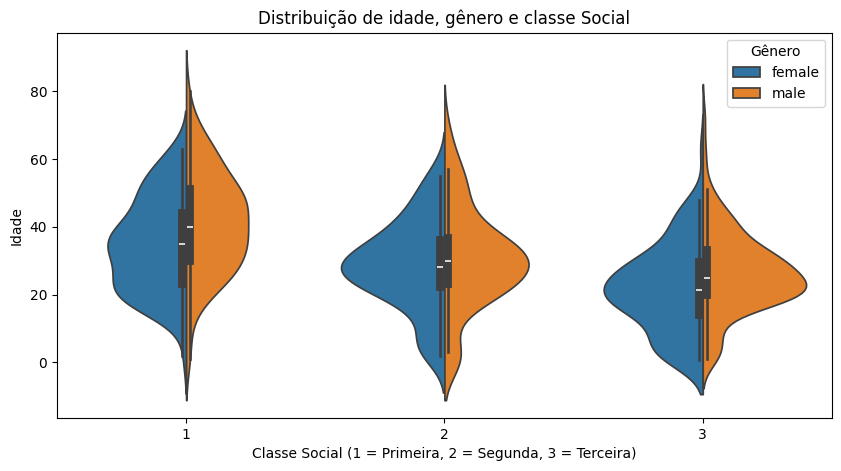

In [76]:
# Distribuição da idade por gênero e classe social
plt.figure(figsize=(10, 5))
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df, split=True)
plt.title('Distribuição de idade, gênero e classe Social')
plt.xlabel('Classe Social (1 = Primeira, 2 = Segunda, 3 = Terceira)')
plt.ylabel('Idade')
plt.legend(title='Gênero')
plt.show()


In [77]:
### 2. Taxa de Sobrevivência por Faixa Etária

# Criando faixas etárias
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 16, 30, 50, 100], 
                                labels=['Criança','Jovem', 'Adulto', 'Idoso'])

print('\nTaxa de sobrevivência por faixa etária\n')

age_group_survived = titanic_df.groupby('AgeGroup', observed=False)['Survived'].mean()
print(age_group_survived)


Taxa de sobrevivência por faixa etária

AgeGroup
Criança    0.550000
Jovem      0.359223
Adulto     0.423237
Idoso      0.343750
Name: Survived, dtype: float64


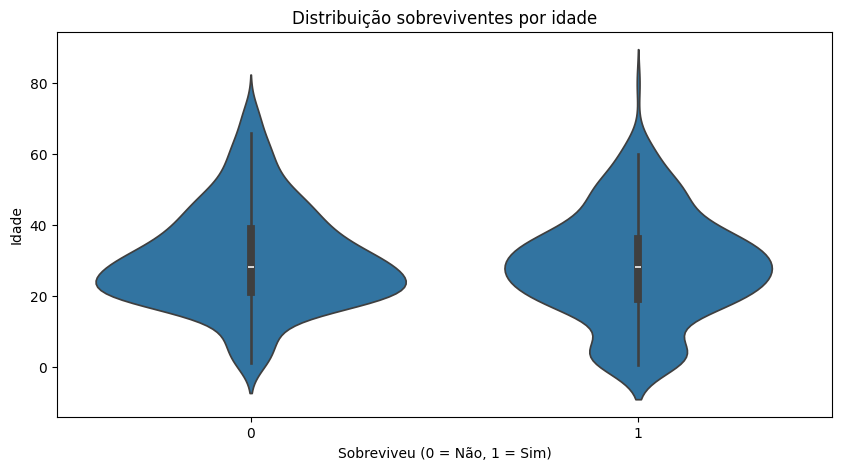

In [78]:
# Distribuição de faixa etária entre os sobreventes e não sobreviventes
plt.figure(figsize=(10, 5))
# sns.boxplot(data=titanic_df, x='Survived', y='Age')
sns.violinplot(x='Survived', y='Age', data=titanic_df)
plt.title('Distribuição sobreviventes por idade')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

In [79]:
### 3. Relação entre Tarifa e Sobrevivência

print('# Tarifa para cada grupo de sobrevivência\n')

fare_group_survived = titanic_df.groupby('Survived')['Fare'].describe()
print(fare_group_survived)


# Tarifa para cada grupo de sobrevivência

          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


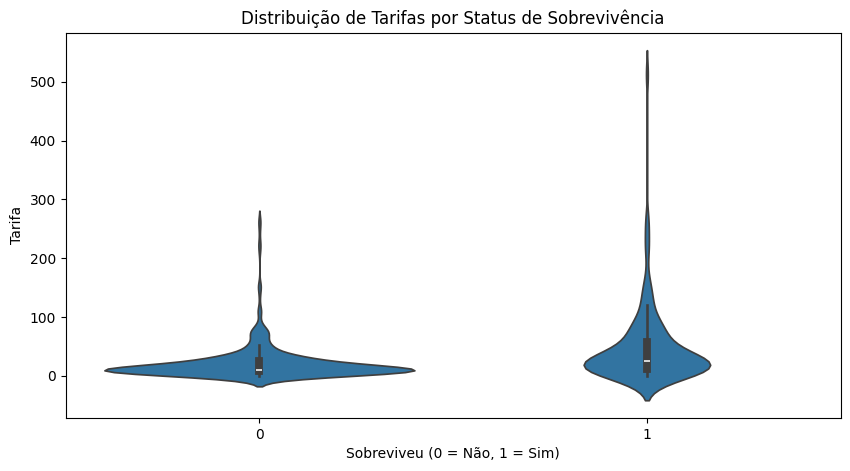

In [80]:
# Distribuição das tarifas pagas para cada grupo de sobrevivência
plt.figure(figsize=(10, 5))
sns.violinplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Distribuição de Tarifas por Status de Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Tarifa')
plt.show()